In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import itertools
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('C:/Users/fitec/Downloads/2019INOUT_220419.csv', sep =',',nrows=None, na_values=r'\N')
df_copy = df.copy()

c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['location_accuracy', 'location_provider', 'misc_time_zone_id',
       'wifi_rssi', 'wifi_link_speed', 'wifi_frequency', 'network_type',
       'sensor_ambient_illuminance', 'sensor_ambient_pressure',
       'signal_strength_lte_cqi', 'sensor_geomagnetic_x',
       'sensor_geomagnetic_y', 'sensor_geomagnetic_z',
       'signal_strength_lte_rsrp', 'sound_level', 'sensor_proximity',
       'sensor_accelerometer_x', 'sensor_accelerometer_y',
       'sensor_accelerometer_z', 'location_speed', 'speed_in_cell',
       'time_in_cell', 'meta_indoor', 'meta_indoor_probability',
       'meta_outdoor_probability', 'training_tag'],
      dtype='object')

In [4]:
df.head()

,location_accuracy,location_provider,misc_time_zone_id,wifi_rssi,wifi_link_speed,wifi_frequency,network_type,sensor_ambient_illuminance,sensor_ambient_pressure,signal_strength_lte_cqi,...,sensor_accelerometer_x,sensor_accelerometer_y,sensor_accelerometer_z,location_speed,speed_in_cell,time_in_cell,meta_indoor,meta_indoor_probability,meta_outdoor_probability,training_tag
0,42.500,network,America/Sao_Paulo,-77.0,43.0,2462.0,HSPA,0.0,NaN,NaN,...,-2.749710,-1.196930,9.206192,0.000000,NaN,NaN,1.0,0.897859,0.102141,NaN
1,26.885,network,America/Sao_Paulo,NaN,NaN,NaN,Unknown,0.0,NaN,0.0,...,-9.602875,0.707230,-1.873291,0.000000,NaN,NaN,1.0,0.938019,0.061981,NaN
2,10.000,gps,America/Sao_Paulo,NaN,NaN,NaN,Unknown,10.0,NaN,NaN,...,-1.417000,1.647000,9.098000,0.073091,NaN,NaN,0.0,0.369782,0.630218,NaN
3,10.000,gps,America/Sao_Paulo,NaN,NaN,NaN,Unknown,2.0,NaN,NaN,...,-10.056000,-2.470000,1.781000,0.000000,NaN,NaN,0.0,0.099714,0.900286,NaN
4,92.865,network,America/Sao_Paulo,-63.0,11.0,2412.0,LTE,333.0,NaN,NaN,...,0.047884,0.416591,9.878476,0.000000,NaN,NaN,1.0,0.980363,0.019637,NaN


In [5]:
df.dtypes

location_accuracy             float64
location_provider              object
misc_time_zone_id              object
wifi_rssi                     float64
wifi_link_speed               float64
wifi_frequency                float64
network_type                   object
sensor_ambient_illuminance    float64
sensor_ambient_pressure       float64
signal_strength_lte_cqi       float64
sensor_geomagnetic_x          float64
sensor_geomagnetic_y          float64
sensor_geomagnetic_z          float64
signal_strength_lte_rsrp      float64
sound_level                   float64
sensor_proximity              float64
sensor_accelerometer_x        float64
sensor_accelerometer_y        float64
sensor_accelerometer_z        float64
location_speed                float64
speed_in_cell                 float64
time_in_cell                  float64
meta_indoor                   float64
meta_indoor_probability       float64
meta_outdoor_probability      float64
training_tag                   object
dtype: objec

In [6]:
df.isnull().sum(axis = 0)

location_accuracy                    0
location_provider                    0
misc_time_zone_id                    0
wifi_rssi                      8226763
wifi_link_speed                8345922
wifi_frequency                 8552563
network_type                    567018
sensor_ambient_illuminance     5396557
sensor_ambient_pressure       19540473
signal_strength_lte_cqi       13533402
sensor_geomagnetic_x           9847286
sensor_geomagnetic_y           9847286
sensor_geomagnetic_z           9847286
signal_strength_lte_rsrp      16759048
sound_level                   14455209
sensor_proximity                161192
sensor_accelerometer_x            1572
sensor_accelerometer_y            4156
sensor_accelerometer_z            2536
location_speed                       0
speed_in_cell                 15937189
time_in_cell                  15937409
meta_indoor                    1254253
meta_indoor_probability        1249882
meta_outdoor_probability       1249882
training_tag             

In [41]:
df.drop(['training_tag', 'signal_strength_lte_rsrp', 'time_in_cell', 'sensor_ambient_pressure', 'signal_strength_lte_cqi'],
        axis=1, inplace=True)

In [42]:
df.dropna(inplace=True)

In [43]:
df = df[(df['meta_indoor_probability']>0.9)|(df['meta_outdoor_probability']>0.9)]

In [45]:
df.to_csv('indoor_outdoor_90.csv')

In [46]:
df['meta_indoor'].value_counts()

1.0    1380770
0.0       1450
Name: meta_indoor, dtype: int64

In [47]:
g = df.groupby('meta_indoor')
g.size().min()
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
df = g.reset_index(drop=True)
df['meta_indoor'].value_counts()

1.0    1450
0.0    1450
Name: meta_indoor, dtype: int64

In [48]:
df.drop(['meta_indoor_probability','meta_outdoor_probability', 'misc_time_zone_id'], axis=1, inplace=True)

In [49]:
def categorical_toNumerical(y):
    enconder_output = preprocessing.LabelEncoder()
    a_str = y.astype('str')
    enconder_output.fit(a_str)
    categorical_to_numerical = enconder_output.transform(a_str)
    return(categorical_to_numerical)

In [24]:
df.dtypes

location_accuracy             float64
location_provider              object
wifi_rssi                     float64
wifi_link_speed               float64
wifi_frequency                float64
network_type                   object
sensor_ambient_illuminance    float64
sensor_geomagnetic_x          float64
sensor_geomagnetic_y          float64
sensor_geomagnetic_z          float64
sound_level                   float64
sensor_proximity              float64
sensor_accelerometer_x        float64
sensor_accelerometer_y        float64
sensor_accelerometer_z        float64
location_speed                float64
speed_in_cell                 float64
meta_indoor                   float64
dtype: object

In [25]:
df.head()

,location_accuracy,location_provider,wifi_rssi,wifi_link_speed,wifi_frequency,network_type,sensor_ambient_illuminance,sensor_geomagnetic_x,sensor_geomagnetic_y,sensor_geomagnetic_z,sound_level,sensor_proximity,sensor_accelerometer_x,sensor_accelerometer_y,sensor_accelerometer_z,location_speed,speed_in_cell,meta_indoor
0,3.216,gps,-33.0,144.0,2412.0,LTE,396.0,-65.58197,139.8938,-238.5595,73.55579,8.0,0.490790,8.637908,4.086727,0.9,0.0,0.0
1,5.300,gps,-71.0,65.0,2412.0,HSPA,23.0,-1.25000,23.7500,12.2500,90.30873,0.0,2.470000,0.383000,9.232000,0.0,0.0,0.0
2,7.000,gps,-66.0,57.0,2417.0,LTE,8.0,-10.93750,-50.1250,7.8750,89.89867,100.0,1.312023,9.892841,-1.244985,0.0,0.0,0.0
3,5.400,gps,-72.0,65.0,2462.0,HSPA,23.0,-16.25000,29.7500,-2.7500,90.30873,1.0,0.708000,8.236000,4.099000,0.0,0.0,0.0
4,9.000,gps,-44.0,72.0,2462.0,LTE,87.0,14.81250,-16.4375,1.6875,89.88337,100.0,7.671022,0.450110,5.583278,0.0,0.0,0.0


In [50]:
df['network_type'] = categorical_toNumerical(df['network_type'])
df['location_provider'] = categorical_toNumerical(df['location_provider'])

In [29]:
df.columns

RangeIndex(start=0, stop=18, step=1)

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.003875,0.0,0.849315,0.082081,0.007325,0.285714,0.000106,0.714139,0.322070,0.847118,0.704744,0.05,0.296379,0.699490,0.733417,0.000000,0.0,0.0
1,0.003875,0.0,0.904110,0.165318,0.000000,0.714286,0.000000,0.556778,0.433394,0.520283,0.675209,0.08,0.516435,0.829433,0.587663,0.238544,0.0,0.0
2,0.003373,0.0,0.424658,0.073988,0.007325,0.285714,0.000563,0.658847,0.374906,0.748768,1.000000,0.01,0.453127,0.529093,0.795434,0.000000,0.0,0.0
3,0.001807,0.0,0.808219,0.061272,0.000000,0.571429,0.000380,0.676322,0.368706,0.830350,0.575592,0.08,0.521136,0.710184,0.712353,0.004460,0.0,0.0
4,0.003875,0.0,0.739726,0.149133,0.000000,0.714286,0.000395,0.607041,0.623000,0.506797,0.676858,0.08,0.484712,0.831392,0.597424,0.039862,0.0,0.0


In [55]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
X = df.drop(17, axis=1)
y = df[17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2078,0.023478,1.0,0.424658,0.082081,0.004395,0.285714,0.000000,0.665736,0.333631,0.841734,0.385452,0.05,0.179034,0.786982,0.501596,0.000000,0.0
163,0.009639,0.0,0.561644,0.082081,0.014650,0.571429,0.000000,0.722700,0.587015,0.832414,0.991654,0.08,0.887436,0.488297,0.495631,0.004913,0.0
1938,0.024630,1.0,0.301370,0.065896,0.000000,0.285714,0.003575,0.676070,0.393625,0.814358,0.480440,0.01,0.488956,0.750678,0.695792,0.000000,0.0
252,0.003875,0.0,0.356164,0.011561,0.000000,0.714286,0.007469,0.729002,0.326490,0.834449,0.829724,0.08,0.478973,0.408314,0.714005,0.522285,0.0
2232,0.024383,1.0,0.493151,0.461272,0.846176,0.714286,0.003377,0.722041,0.350908,0.855690,0.624799,0.08,0.458207,0.517157,0.797303,0.000000,0.0


c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


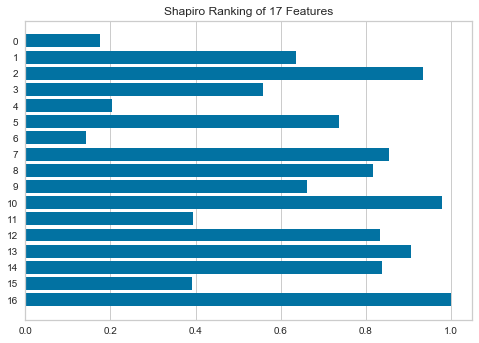

In [58]:
from yellowbrick.features import Rank1D

# # Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=X_train.columns, algorithm='shapiro')

visualizer.fit(X_train, y_train)                # Fit the data to the visualizer
visualizer.transform(X_train)             # Transform the data
visualizer.poof()   

In [35]:
def clusterize(X, n):
    from sklearn import cluster
    agglo = cluster.FeatureAgglomeration(n_clusters = n)
    agglo.fit(X) 
    X_reduced = agglo.transform(X)
    return(X_reduced)

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
kmeans = KMeans(n_clusters=2, random_state=1).fit(X_train)
print (np.unique(y_test))

predicao = kmeans.predict(X_test)
accuracy_score(predicao, y_test)
# kmeans.cluster_centers_


[0. 1.]


0.996551724137931

In [79]:
print(len(predicao))
print(len(X_test))
a = list(zip(X_test[1],X_test[2],predicao))
a = np.array(list(map(list, a)))
b = a[a[:,2].argsort()]
b[:, 2]

580
580


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.